In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# usar dados da base iris
iris = datasets.load_iris()
# usando as duas primeiras colunas
X = iris.data[:, :2] 
y = iris.target

In [2]:
# criação da SVM
C = 1.0
svc = svm.SVC(kernel='linear', C=1000,gamma='auto').fit(X, y)

# criação da mesh para plotar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))


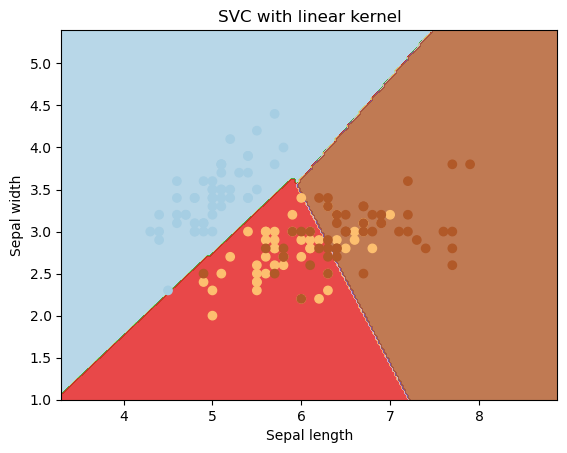

In [3]:
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

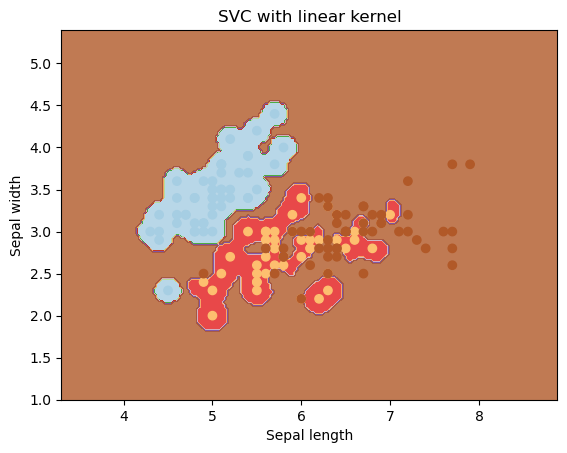

In [4]:
# Tentar com c = 1, 10, 100 e 1000 e gamma = 'auto', 1, 10, 100

svc = svm.SVC(kernel='rbf', C=1000,gamma=100.0).fit(X, y)
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [7]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
import pickle

arquivo = pd.read_csv(r'C:\Users\jpreg\Desktop\Agenda-Guia\2021.1\Bibliografia 2021.1\IA\Arquivos-20210826T114338Z-001\Torta-20210909T114645Z-001\Torta\BoloPaoTorta.csv')
arquivo.head(10)


,Produto,Farinha,Leite,Acucar,Manteiga,Ovo,Fermento,Baunilha,Sal
0,Bolo,55,28,3,7,5,2,0,0
1,Bolo,47,24,12,6,9,1,0,0
2,Torta,29,3,46,6,0,11,0,6
3,Torta,25,3,36,3,14,7,14,5
4,Bolo,47,23,18,6,4,1,0,0
5,Bolo,45,11,17,17,8,1,0,0
6,Bolo,50,25,12,6,5,2,1,0
7,Bolo,55,27,3,7,5,2,1,0
8,Bolo,50,17,17,11,4,1,0,0
9,Pao,39,0,26,19,14,1,1,0


In [8]:
X = arquivo.iloc[:, 1:8].values 
y = arquivo.iloc[:, 0].values
X = pd.DataFrame(X, dtype='float')
X.head(10)

,0,1,2,3,4,5,6
0,55.0,28.0,3.0,7.0,5.0,2.0,0.0
1,47.0,24.0,12.0,6.0,9.0,1.0,0.0
2,29.0,3.0,46.0,6.0,0.0,11.0,0.0
3,25.0,3.0,36.0,3.0,14.0,7.0,14.0
4,47.0,23.0,18.0,6.0,4.0,1.0,0.0
5,45.0,11.0,17.0,17.0,8.0,1.0,0.0
6,50.0,25.0,12.0,6.0,5.0,2.0,1.0
7,55.0,27.0,3.0,7.0,5.0,2.0,1.0
8,50.0,17.0,17.0,11.0,4.0,1.0,0.0
9,39.0,0.0,26.0,19.0,14.0,1.0,1.0


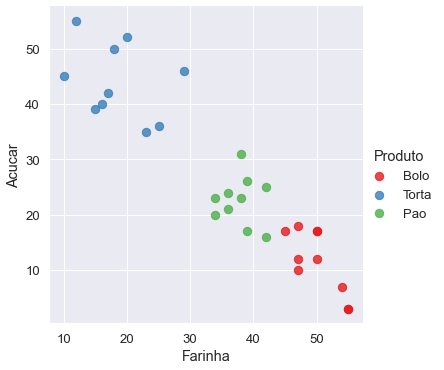

In [9]:
# Plotar dois ingredientes
sns.lmplot(x='Farinha', y='Acucar', data=arquivo, hue='Produto',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
print(X_train, X_test, y_train, y_test)

# Normalizar as variaveis
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

       0     1     2     3     4     5     6
25  38.0  15.0  23.0  15.0   8.0   0.0   1.0
5   45.0  11.0  17.0  17.0   8.0   1.0   0.0
27  54.0  27.0   7.0   5.0   5.0   2.0   0.0
21  15.0   6.0  39.0   3.0  15.0   7.0  14.0
6   50.0  25.0  12.0   6.0   5.0   2.0   1.0
19  16.0  10.0  40.0   5.0   0.0  10.0   0.0
2   29.0   3.0  46.0   6.0   0.0  11.0   0.0
29  50.0  17.0  17.0   8.0   6.0   1.0   0.0
26  42.0  18.0  25.0   9.0   5.0   1.0   0.0
0   55.0  28.0   3.0   7.0   5.0   2.0   0.0
11  34.0  17.0  20.0  20.0   5.0   2.0   1.0
7   55.0  27.0   3.0   7.0   5.0   2.0   1.0
16  34.0  17.0  23.0  11.0  13.0   0.0   1.0
15  36.0  16.0  24.0  12.0   9.0   1.0   1.0
18  18.0   6.0  50.0   5.0   6.0   9.0   0.0
23  17.0   3.0  42.0   5.0   6.0  10.0   0.0
4   47.0  23.0  18.0   6.0   4.0   1.0   0.0
3   25.0   3.0  36.0   3.0  14.0   7.0  14.0
1   47.0  24.0  12.0   6.0   9.0   1.0   0.0
20  23.0   7.0  35.0   7.0   0.0  11.0   0.0
14  38.0  15.0  31.0   8.0   6.0   1.0   1.0
13  36.0  

In [11]:
from sklearn.neighbors import KNeighborsClassifier  
classes = KNeighborsClassifier(n_neighbors=5)  
classes.fit(X_train, y_train)
y_pred = classes.predict(X_test)
y_pred_test = classes.predict(X_test)
df = pd.DataFrame({'Atual': y_test, 'Previsto': y_pred_test})  
df

,Atual,Previsto
0,Pao,Pao
1,Bolo,Bolo
2,Pao,Pao
3,Pao,Bolo
4,Torta,Torta
5,Bolo,Bolo
6,Torta,Torta
7,Torta,Torta


In [12]:
#Avaliando o algoritmo
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  

[[2 0 0]
 [1 2 0]
 [0 0 3]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Bolo       0.67      1.00      0.80         2
         Pao       1.00      0.67      0.80         3
       Torta       1.00      1.00      1.00         3

    accuracy                           0.88         8
   macro avg       0.89      0.89      0.87         8
weighted avg       0.92      0.88      0.88         8



In [19]:
# Calculando o erro
erro = []
for i in range(1, 23):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    erro.append(np.mean(pred_i != y_test))

erro

[0.375,
 0.375,
 0.125,
 0.25,
 0.125,
 0.375,
 0.375,
 0.375,
 0.125,
 0.25,
 0.25,
 0.5,
 0.5,
 0.375,
 0.375,
 0.375,
 0.375,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75]

Text(0, 0.5, 'Erro Medio')

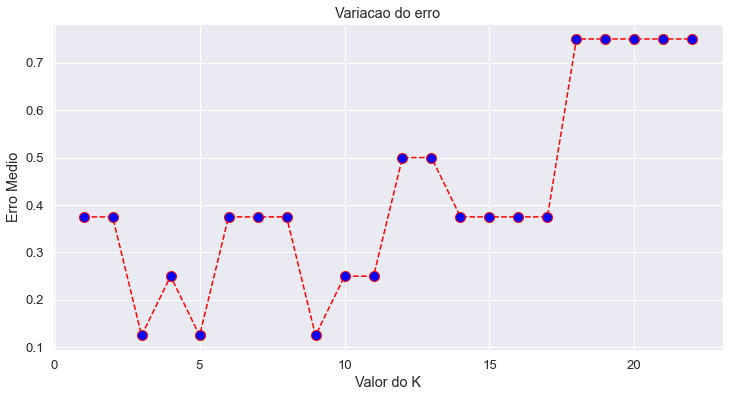

In [20]:
# Construindo os gráficos
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 23), erro, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Variacao do erro')  
plt.xlabel('Valor do K')  
plt.ylabel('Erro Medio')

In [21]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

#variáveis de predição e objetivo
x = np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

#Criar um Classificador Gaussiano
model = GaussianNB()

# Treino do modelo
model.fit(x, y)

#Predição da Saida
predicted= model.predict([[1,2],[3,4]])
print (predicted)

[3 4]
